Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

### snippet 4.7

In [3]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);

### snippet 4.8

Show first 5 rows of DataFrame df

In [4]:
first(df, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### snippet 4.9

Show first 5 heigth values in df

In [5]:
df[:height][1:5]

5-element Array{Union{Missing, Float64},1}:
 151.765
 139.7  
 136.525
 156.845
 145.415

### snippet 4.10

Use only adults

In [6]:
df2 = filter(row -> row[:age] >= 18, df);

Our model:

In [7]:
m4_1 = "
  height ~ Normal(μ, σ) # likelihood
  μ ~ Normal(178,20) # prior
  σ ~ Uniform(0, 50) # prior
";

Plot the densities.

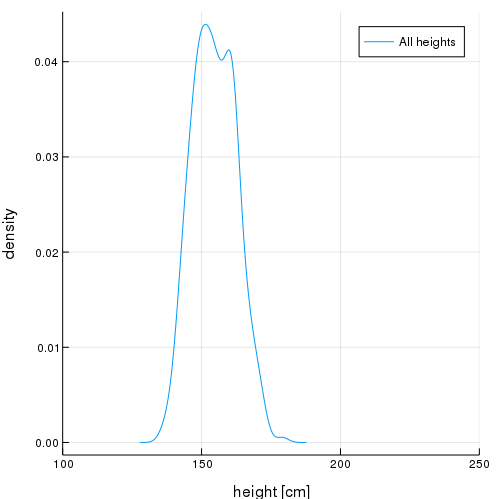

In [8]:
p = Vector{Plots.Plot{Plots.GRBackend}}(undef, 3)
p[1] = density(df2[:height], xlim=(100,250), lab="All heights", xlab="height [cm]", ylab="density")

### snippet 4.10

Show  μ prior

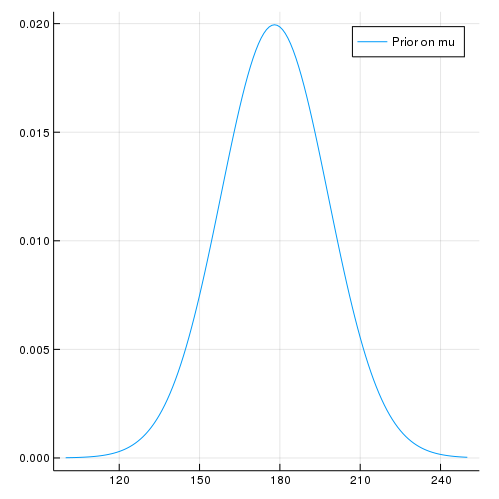

In [9]:
d1 = Normal(178, 20)
p[2] = plot(100:250, [pdf(d1, μ) for μ in 100:250], lab="Prior on mu")

### snippet 4.11

Show σ  prior

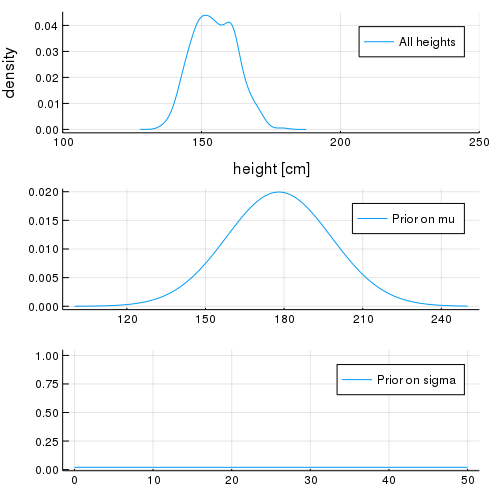

In [10]:
d2 = Uniform(0, 50)
p[3] = plot(0:0.1:50, [pdf(d2, σ) for σ in 0:0.1:50], lab="Prior on sigma")

plot(p..., layout=(3,1))

### snippet 4.13

In [11]:
sample_mu = rand(d1, 10000)
sample_sigma = rand(d2, 10000)
prior_height = [rand(Normal(sample_mu[i], sample_sigma[i]), 1)[1] for i in 1:10000]
df2 = DataFrame(mu = sample_mu, sigma=sample_sigma, prior_height=prior_height);
first(df2, 5)

,mu,sigma,prior_height
,Float64,Float64,Float64
1,205.442,46.2829,201.873
2,181.313,26.5466,148.345
3,187.037,31.0417,137.15
4,164.359,15.6047,163.83
5,194.937,25.8808,187.976


Show density of prior_height

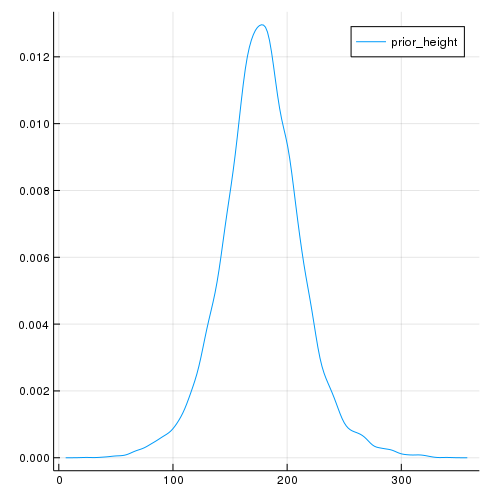

In [12]:
density(prior_height, lab="prior_height")

Use data from m4.1s to show CmdStan results

Check if the m4.1s.jls file is present. If not, run the model.

In [13]:
!isfile(joinpath(ProjDir, "m4.1s.jls")) && include(joinpath(ProjDir, "m4.1s.jl"))

chn = deserialize(joinpath(ProjDir, "m4.1s.jls"))

Object of type "Chains{Float64}"

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Union{Missing, Float64}[7.44663 154.14; 8.17762 155.18; … ; 7.44251 154.518; 7.58038 154.763]

Union{Missing, Float64}[7.64474 154.312; 7.73288 154.883; … ; 7.78782 154.613; 8.07656 154.457]

Union{Missing, Float64}[7.39031 154.978; 7.55055 154.98; … ; 7.32308 155.447; 8.28391 154.515]

Union{Missing, Float64}[7.61427 154.641; 7.7666 154.488; … ; 7.21947 154.721; 7.3668 154.319]

Describe the draws

In [14]:
describe(chn)

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Empirical Posterior Estimates:
          Mean        SD       Naive SE       MCSE      ESS
sigma   7.7587156 0.29214740 0.0046192559 0.0055557426 1000
   mu 154.5957478 0.40054114 0.0063331115 0.0070740234 1000

Quantiles:
          2.5%      25.0%      50.0%      75.0%      97.5%  
sigma   7.2300262   7.55012   7.749485   7.9560625   8.35704
   mu 153.7989750 154.32675 154.596000 154.8600000 155.38605



Plot the density of posterior draws

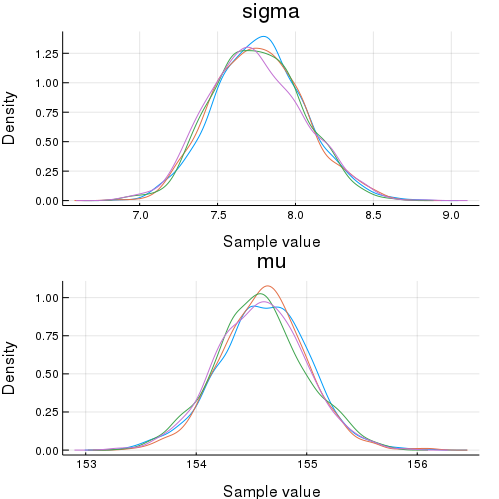

In [15]:
density(chn)

End of `clip-07-13s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*